In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data = pd.read_csv(r"C:\Users\zhang\Downloads\driver-data.csv")
# data = data.drop(data.columns[0], axis=1)
# data = data.to_numpy()
# display(data)

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])# Your code to calculate the norm between (X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] =np.argmin(distance)
        
        
            
            
        
     ### END CODE HERE ###
    
    return idx

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):   
          points = X[idx == k] # Your code here to get a list of all data points in X assigned to centroid k  
          centroids[k] =np.mean(points, axis = 0)
        
        
    ### END CODE HERE ## 
    
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
        print(centroids)
    plt.show() 
    return centroids, idx

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # Define colormap to match Figure 1 in the notebook
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)


def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()


def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)


In [5]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids 

In [6]:
# # Load an example dataset
# X = data
# K = 3
# # Set initial centroids
# initial_centroids = kMeans_init_centroids(X, K)
# print(initial_centroids)

# # Number of iterations
# max_iters = 10
# # Run K-Means
# centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

**image processing**

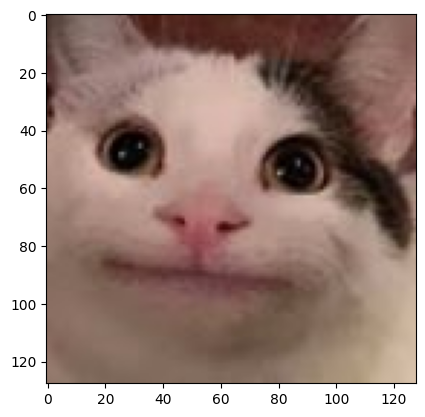

In [7]:
#original_img = plt.imread('bird_small.png')
original_img = plt.imread('Beluga_128.png')
plt.imshow(original_img)

In [8]:
print("Shape of original_img is:", original_img.shape)
original_img = original_img[:, :, :3]
print("Shape of new* original_img is:", original_img.shape)
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Shape of original_img is: (128, 128, 4)
Shape of new* original_img is: (128, 128, 3)


In [9]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 2
max_iters = 15

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/14
[[0.74355859 0.62568152 0.57768822]
 [0.46327361 0.34661889 0.31034636]]
K-Means iteration 1/14
[[0.7191385  0.59907705 0.55322742]
 [0.44105697 0.3258206  0.28982908]]
K-Means iteration 2/14
[[0.70541632 0.58490479 0.53999388]
 [0.42911157 0.31456575 0.27867991]]
K-Means iteration 3/14
[[0.69726908 0.57663274 0.53222615]
 [0.42187169 0.30771872 0.27188322]]
K-Means iteration 4/14
[[0.69206655 0.57135415 0.52718335]
 [0.41708681 0.30321681 0.26746535]]
K-Means iteration 5/14
[[0.68725091 0.56663173 0.52265507]
 [0.41258577 0.29885444 0.26319695]]
K-Means iteration 6/14
[[0.68313217 0.56255269 0.51865405]
 [0.40838662 0.29482743 0.25933737]]
K-Means iteration 7/14
[[0.67980915 0.55927759 0.51545149]
 [0.40486419 0.2914367  0.25607952]]
K-Means iteration 8/14
[[0.6770854  0.55652666 0.51280844]
 [0.401804   0.28856197 0.25327107]]
K-Means iteration 9/14
[[0.6748082  0.55427259 0.51058978]
 [0.39919266 0.28606322 0.25088853]]
K-Means iteration 10/14
[[0.67337406 0.5

<Figure size 800x600 with 0 Axes>

In [10]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [1 1 1 1 1]


C:\Users\zhang\AppData\Local\Temp\ipykernel_18552\635383325.py:41: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0., 0., 0., .2))


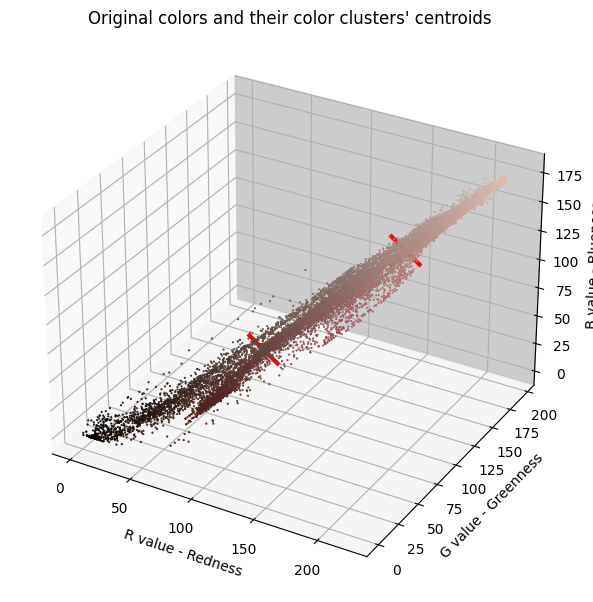

In [11]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

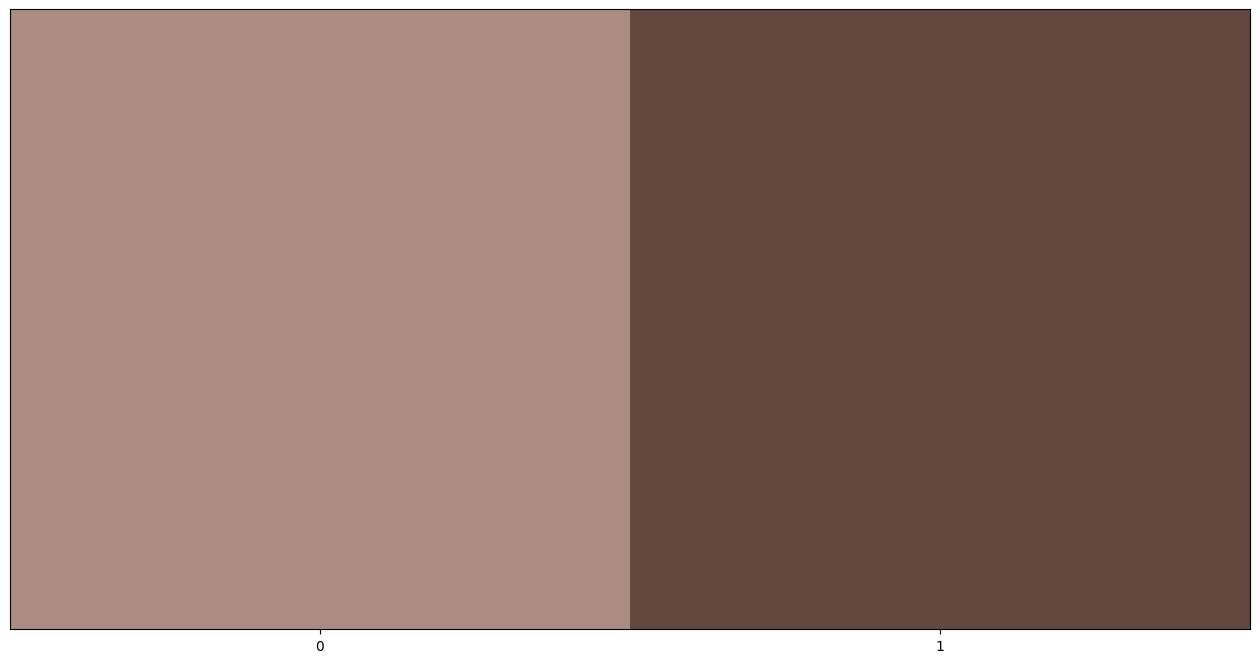

In [12]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

**compress the image**

In [13]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

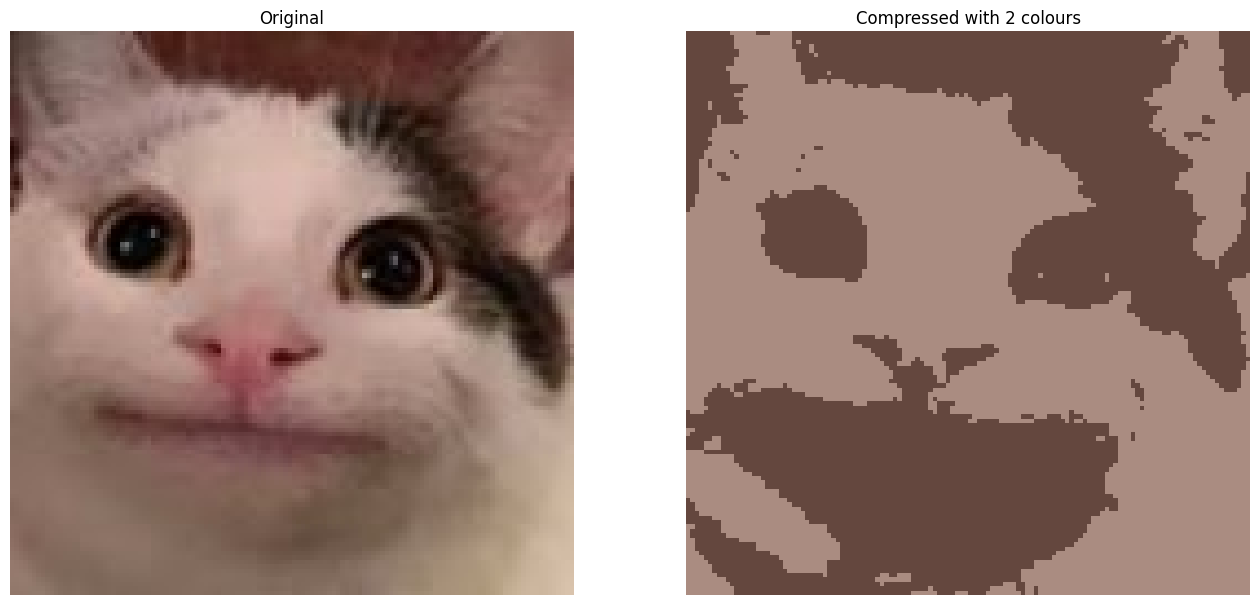

In [14]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()